In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('Cleaned_data.csv',index_col = 0)

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,age,python,R,spark,aws,excel,Job_simp,seniority,num_comp,desc_len
0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,49,1,0,0,0,1,data scientist,na,1,2536
1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,38,1,0,0,0,0,data scientist,na,1,4783
2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,12,1,0,1,0,1,data scientist,na,1,3461
3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,57,1,0,0,0,0,data scientist,na,3,3883
4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,24,1,0,0,0,1,data scientist,na,3,2728


In [4]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_location,age,python,R,spark,aws,excel,num_comp,desc_len
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,48.456873,0.528302,0.002695,0.225067,0.237197,0.522911,1.673854,3869.545822
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.900445,0.499535,0.051882,0.417908,0.425651,0.499812,0.918451,1521.495868
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,407.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2801.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,26.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3731.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,61.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3.000000,4740.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,278.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,10051.000000


In [5]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'job_state', 'same_location', 'age', 'python', 'R', 'spark', 'aws',
       'excel', 'Job_simp', 'seniority', 'num_comp', 'desc_len'],
      dtype='object')

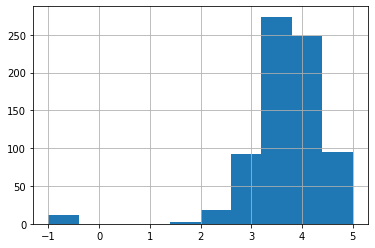

In [6]:
df.Rating.hist()

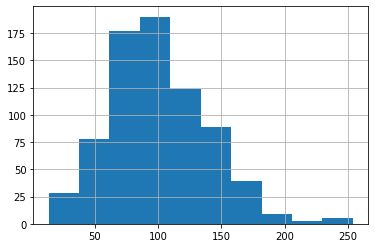

In [7]:
df.avg_salary.hist()

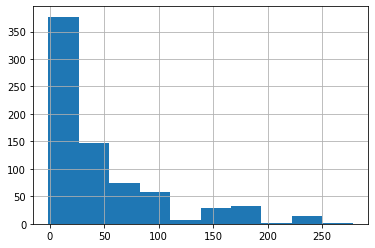

In [8]:
df.age.hist() # Not normally distributed. normalize before use

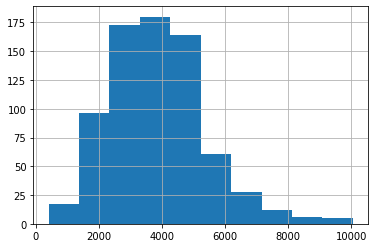

In [9]:
df.desc_len.hist()

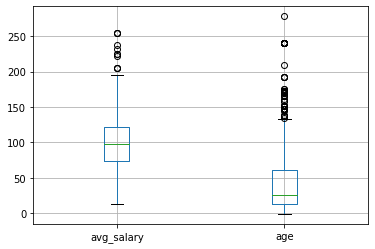

In [10]:
# Boxplot for outlier diction
df.boxplot(column=['avg_salary','age'])

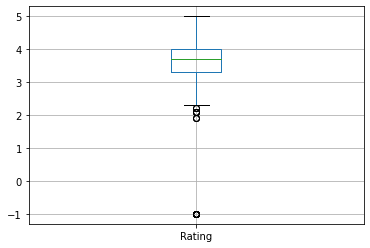

In [11]:
df.boxplot(column=['Rating'])

#**Look for correlations between contuniues variablesd**

In [12]:
corr = df[['age','avg_salary','Rating','desc_len','num_comp']].corr()

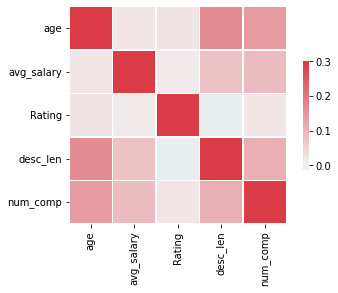

In [13]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### The Description of job  and age of company are highly correlated.
### older companies have more competitors.

## Categorical Features

In [14]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'Company Name', 'job_state','same_location', 'python', 'R','spark', 'aws', 'excel', 'Job_simp', 'seniority']]

graph for Location: total = 200


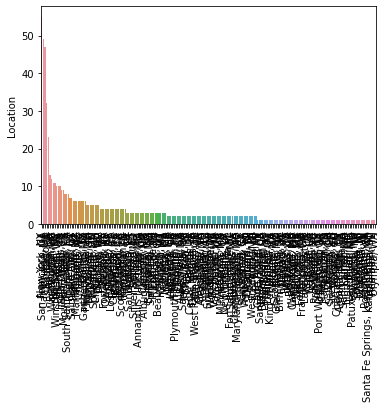

graph for Headquarters: total = 198


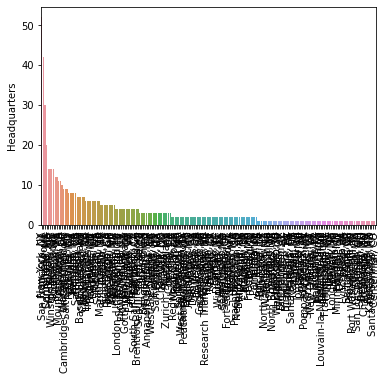

graph for Size: total = 9


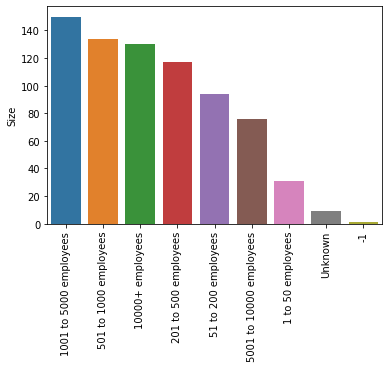

graph for Type of ownership: total = 11


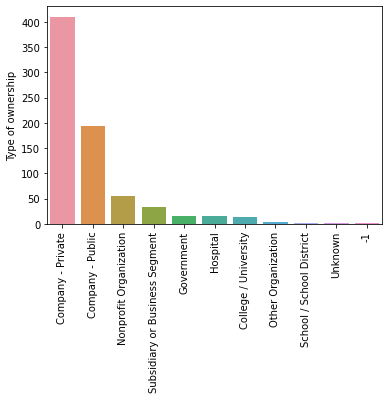

graph for Industry: total = 60


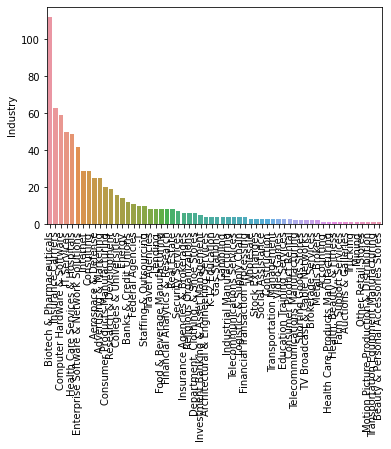

graph for Sector: total = 25


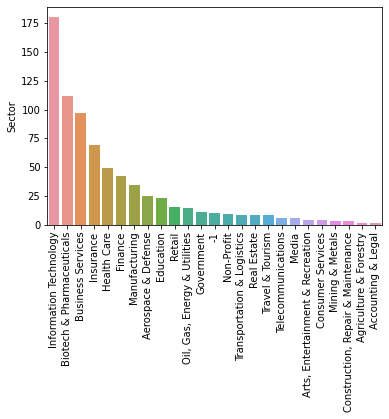

graph for Revenue: total = 14


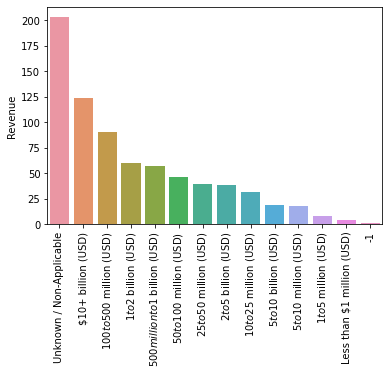

graph for Company Name: total = 343


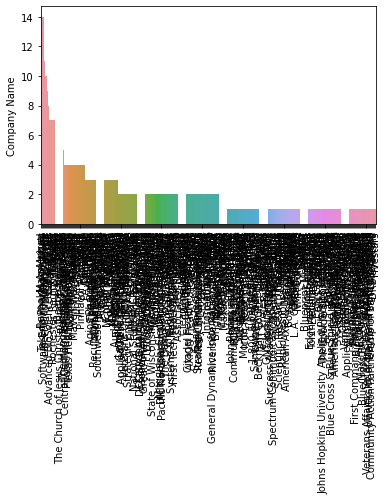

graph for job_state: total = 38


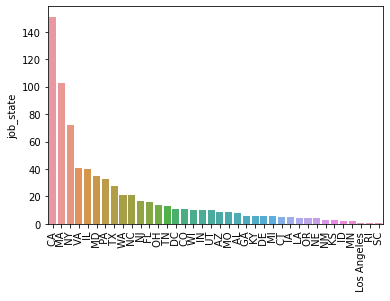

graph for same_location: total = 2


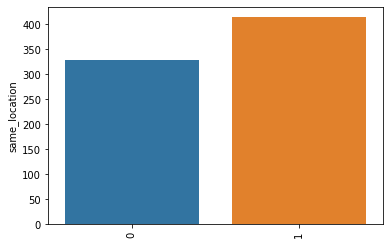

graph for python: total = 2


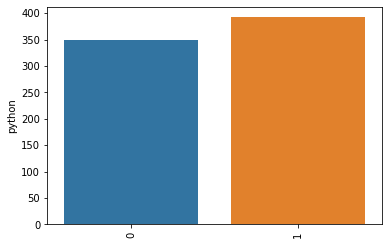

graph for R: total = 2


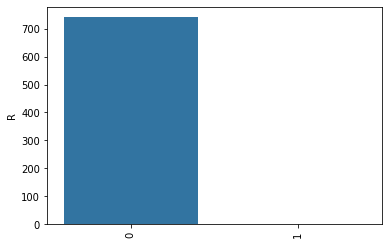

graph for spark: total = 2


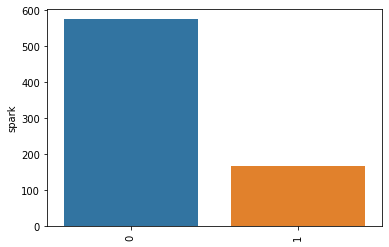

graph for aws: total = 2


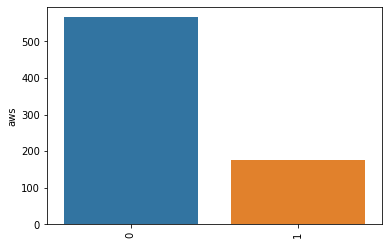

graph for excel: total = 2


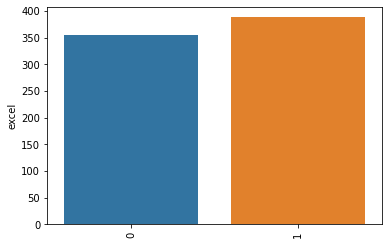

graph for Job_simp: total = 7


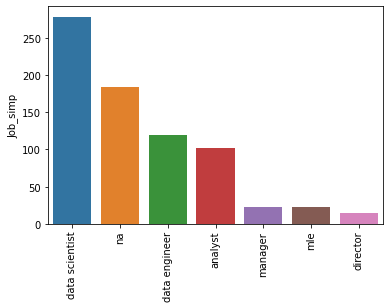

graph for seniority: total = 3


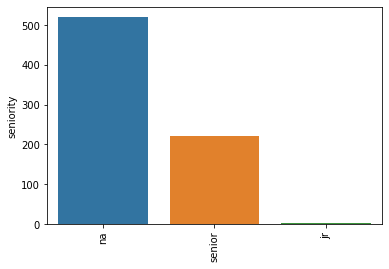

In [15]:
for i in df_cat:
  cat_num = df_cat[i].value_counts()
  print("graph for %s: total = %d" % (i, len(cat_num)))
  chart = sns.barplot(x=cat_num.index, y=cat_num)
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)# Rotation of xlabel
  plt.show()

graph for Location: total = 20


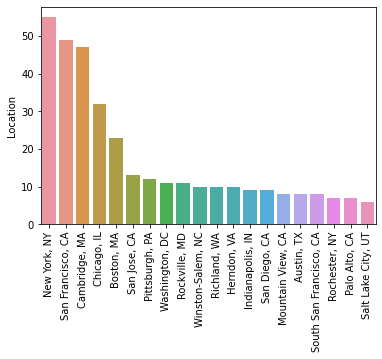

graph for Headquarters: total = 20


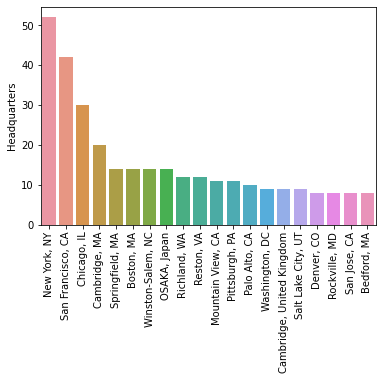

graph for Company Name: total = 20


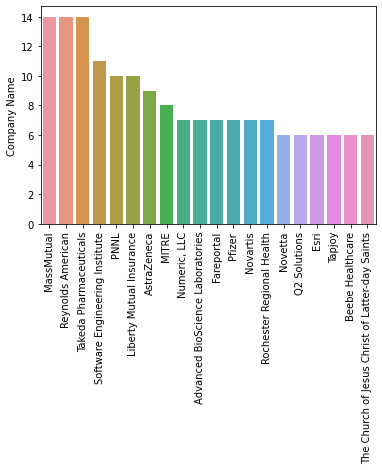

In [16]:
for i in df_cat[['Location','Headquarters','Company Name']].columns:
  cat_num = df_cat[i].value_counts()[:20] # Top 20 companies
  print("graph for %s: total = %d" % (i, len(cat_num)))
  chart = sns.barplot(x=cat_num.index, y=cat_num)
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)# Rotation of xlabel
  plt.show()

In [17]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'job_state', 'same_location', 'age', 'python', 'R', 'spark', 'aws',
       'excel', 'Job_simp', 'seniority', 'num_comp', 'desc_len'],
      dtype='object')

In [38]:
pd.pivot_table(df,index = 'Job_simp', values = 'avg_salary').sort_values('avg_salary',ascending=False)

,avg_salary
Job_simp,
director,168.607143
mle,126.431818
data scientist,117.564516
data engineer,105.403361
na,84.853261
manager,84.022727
analyst,65.857843




**1.   Data Science Directors have the most salary followed bt ML enginners and then data scientists**



In [39]:
pd.pivot_table(df,index = ['Job_simp','seniority'], values = 'avg_salary').sort_values('avg_salary',ascending=False)

avg_salary
Job_simp       seniority            
director       na         168.607143
mle            senior     142.071429
data scientist senior     138.956522
data engineer  senior     124.689189
mle            na         119.133333
na             senior     109.061404
data scientist na         107.043011
               jr         106.500000
data engineer  na          96.701220
manager        na          84.022727
analyst        senior      79.092593
na             na          73.988189
analyst        na          61.155405
               jr          56.500000

In [20]:
pd.pivot_table(df,index = ['job_state','Job_simp'], values = 'avg_salary').sort_values('job_state',ascending=False)

avg_salary
job_state Job_simp                  
 WI       na               54.000000
          data scientist  113.500000
          analyst          58.833333
 WA       na               97.500000
          data scientist   99.764706
...                              ...
 AZ       analyst          55.000000
          na              124.500000
 AL       na               43.750000
          data engineer    65.000000
          analyst          62.200000

[115 rows x 1 columns]

In [21]:
#To see the full dataframe

pd.options.display.max_rows 
pd.set_option('display.max_rows', None)
pd.pivot_table(df,index = ['job_state','Job_simp'], values = 'avg_salary').sort_values('job_state',ascending=False)

avg_salary
job_state    Job_simp                  
 WI          na               54.000000
             data scientist  113.500000
             analyst          58.833333
 WA          na               97.500000
             data scientist   99.764706
             analyst          54.500000
 VA          na               79.300000
             mle              87.000000
             data scientist  108.416667
             data engineer    96.900000
             analyst          71.583333
 UT          data engineer   100.333333
             analyst          54.750000
             data scientist  140.500000
 TX          na               41.285714
             data scientist  100.730769
             data engineer   113.062500
 TN          data scientist   96.000000
             data engineer   100.950000
             analyst          13.500000
 SC          na               60.500000
 RI          analyst         100.000000
 PA          manager         109.666667
             data engineer    91.500000
             data scientist  113.333333
             analyst          62.750000
             mle             120.500000
             na               76.062500
 OR          data scientist   98.500000
             data engineer    73.000000
 OH          na               91.166667
             data scientist  105.285714
             analyst          53.875000
 NY          na               81.583333
             mle             125.000000
             data scientist  115.250000
             data engineer    86.375000
             analyst          65.607143
 NM          data scientist   74.333333
 NJ          data scientist  106.875000
             analyst          83.583333
             data engineer   112.000000
             manager         109.500000
             director        161.500000
             na               82.500000
 NE          na               41.000000
 NC          na               90.916667
             data scientist  117.000000
             data engineer   104.250000
 MO          na               72.333333
             manager          40.500000
             data scientist  127.666667
             analyst          61.000000
 MN          data engineer    95.000000
             analyst          76.000000
 MI          data scientist  106.625000
             manager          87.500000
 MD          na               88.750000
             data scientist  109.115385
             data engineer   109.000000
             analyst          80.666667
 MA          na              107.478261
             manager          71.900000
             director        117.833333
             data scientist  113.750000
             data engineer   107.291667
             analyst          59.125000
 Los Angeles data scientist  107.500000
 LA          analyst          48.000000
             data engineer    70.500000
             na               20.000000
 KY          na              103.500000
             data scientist   84.000000
 KS          mle              87.000000
 IN          na               69.000000
             data scientist   84.500000
             data engineer   114.500000
 IL          analyst          66.500000
             na               57.166667
             mle             133.000000
             director        221.750000
             data scientist  117.233333
             data engineer    96.125000
 ID          analyst          56.250000
 IA          analyst          43.000000
             data engineer   102.833333
 GA          data scientist   81.333333
             na               80.000000
 FL          data scientist   97.357143
             data engineer    91.833333
             analyst          47.500000
 DE          na               27.500000
 DC          data scientist  149.000000
             data engineer    85.000000
             analyst          63.500000
 CT          na               62.500000
             data scientist   84.000000
 CO          mle             100.500000
             data engineer   

In [42]:
pd.pivot_table(df,index = ['job_state','Job_simp'], values = 'avg_salary').sort_values('job_state',ascending=False)[:10]

avg_salary
job_state Job_simp                  
 WI       na               54.000000
          data scientist  113.500000
          analyst          58.833333
 WA       na               97.500000
          data scientist   99.764706
          analyst          54.500000
 VA       na               79.300000
          mle              87.000000
          data scientist  108.416667
          data engineer    96.900000

### Wisconsin have the most data science jobs followed by Washington and then Virginia


In [43]:
pd.pivot_table(df,index = ['job_state','Job_simp'], values = 'avg_salary').sort_values('avg_salary',ascending=False)[:10]

,,avg_salary
job_state,Job_simp,
IL,director,221.750000
CA,mle,177.300000
NJ,director,161.500000
DC,data scientist,149.000000
CA,data scientist,143.044776
UT,data scientist,140.500000
IL,mle,133.000000
CA,data engineer,129.540000
MO,data scientist,127.666667


###Compare by salary ,Illinois offers most salary. 

In [22]:
pd.options.display.max_rows 
pd.set_option('display.max_rows', None)
pd.pivot_table(df,index = ['job_state','Job_simp'], values = 'avg_salary',aggfunc='count').sort_values('job_state',ascending=False) # for counts aggfunc

avg_salary
job_state    Job_simp                  
 WI          na                       4
             data scientist           3
             analyst                  3
 WA          na                       1
             data scientist          17
             analyst                  3
 VA          na                       5
             mle                      2
             data scientist          18
             data engineer           10
             analyst                  6
 UT          data engineer            3
             analyst                  4
             data scientist           3
 TX          na                       7
             data scientist          13
             data engineer            8
 TN          data scientist           1
             data engineer           10
             analyst                  2
 SC          na                       1
 RI          analyst                  1
 PA          manager                  3
             data engineer            1
             data scientist           6
             analyst                  8
             mle                      7
             na                       8
 OR          data scientist           3
             data engineer            1
 OH          na                       3
             data scientist           7
             analyst                  4
 NY          na                      12
             mle                      2
             data scientist          40
             data engineer            4
             analyst                 14
 NM          data scientist           3
 NJ          data scientist           4
             analyst                  6
             data engineer            2
             manager                  2
             director                 2
             na                       1
 NE          na                       4
 NC          na                      12
             data scientist           3
             data engineer            6
 MO          na                       3
             manager                  1
             data scientist           3
             analyst                  2
 MN          data engineer            1
             analyst                  1
 MI          data scientist           4
             manager                  2
 MD          na                      16
             data scientist          13
             data engineer            3
             analyst                  3
 MA          na                      46
             manager                  5
             director                 6
             data scientist          30
             data engineer           12
             analyst                  4
 Los Angeles data scientist           1
 LA          analyst                  1
             data engineer            2
             na                       1
 KY          na                       4
             data scientist           2
 KS          mle                      3
 IN          na                       4
             data scientist           2
             data engineer            4
 IL          analyst                  3
             na                       6
             mle                      2
             director                 6
             data scientist          15
             data engineer            8
 ID          analyst                  2
 IA          analyst                  2
             data engineer            3
 GA          data scientist           3
             na                       3
 FL          data scientist           7
             data engineer            3
             analyst                  6
 DE          na                       6
 DC          data scientist           5
             data engineer            4
             analyst                  2
 CT          na                       3
             data scientist           2
 CO          mle                      1
             data engineer   

In [44]:
pd.pivot_table(df[df.Job_simp == 'data scientist'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary',ascending=False)[:10]

,avg_salary
job_state,
DC,149.000000
CA,143.044776
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [24]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'hourly', 'employer_provided', 'python', 'R', 'spark', 'aws', 'excel', 'Type of ownership','avg_salary']]

In [25]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index =i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

ValueError: ignored

In [45]:
pd.pivot_table(df, index = 'Industry', values = 'avg_salary').sort_values('avg_salary',ascending=False)[:10]

,avg_salary
Industry,
Other Retail Stores,163.500000
Motion Picture Production & Distribution,146.000000
Financial Analytics & Research,145.125000
"Health, Beauty, & Fitness",139.500000
Telecommunications Services,131.500000
Brokerage Services,129.000000
Auctions & Galleries,128.000000
Internet,123.810345
Investment Banking & Asset Management,118.400000


### The chart above shows the top ten industry paying the highest

In [46]:
pd.pivot_table(df_pivots,index = 'Revenue',columns = 'python',values = 'avg_salary', aggfunc='count')

python,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0
